In [1]:
%pip install numpy==1.24.1
%pip install pandas==1.5.3
%pip install seaborn==0.12.2
%pip install scikit-learn==1.2.0
%pip install plotly==5.12.0
%pip install matplotlib==3.6.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the data
df = pd.read_csv('../Video_games_esrb_rating.csv')
# print(df.head())
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
# Typo in the column name fixed
df = df.rename(columns={"strong_janguage": "strong_language"})

In [5]:
# Drop the title column
df.drop(['title'], inplace=True, axis=1)

In [6]:
# Get all the unique values in the esrb_rating column
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [7]:
# Create a dictionary to map the ratings to numbers
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
# Create the model
svclassifier = SVC(kernel='linear')
# Train the model
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
# Make predictions
y_pred = svclassifier.predict(X_test)

Text(0.5, 1.0, 'ESRB Rating')

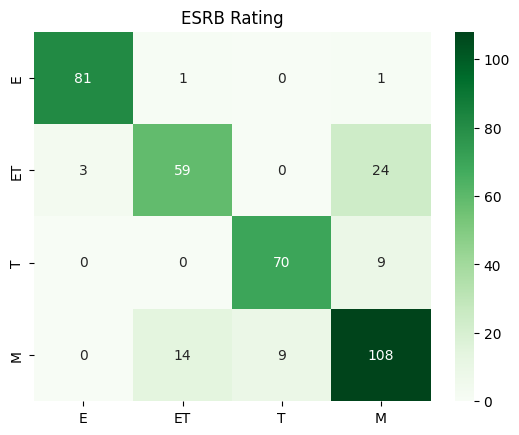

In [11]:
# Evaluate the model
cm = confusion_matrix(y_test,y_pred)
Labels = ["E","ET","T","M"] # labels for x-axis
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels).set_title('ESRB Rating')

In [12]:
# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           E       0.96      0.98      0.97        83
          ET       0.80      0.69      0.74        86
           M       0.89      0.89      0.89        79
           T       0.76      0.82      0.79       131

    accuracy                           0.84       379
   macro avg       0.85      0.84      0.85       379
weighted avg       0.84      0.84      0.84       379

